In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle, os, sys
import matplotlib as mpl

In [2]:
from get_weight_isoscalar_constant_Emin_50GeV import *

In [3]:
indir = '/home/mliubar/projects/rpp-kenclark/hignight/atmo_flux'
numu = pickle.load(open(os.path.join(indir, 'Level5p_IC86.2013_genie_numu.14600.rlogL.pckl'),'rb'),encoding='latin1')
nue = pickle.load(open(os.path.join(indir, 'Level5p_IC86.2013_genie_nue.12600.rlogL.pckl'),'rb'),encoding='latin1')

In [4]:
plt.rcParams.update({'font.size': 20})
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['patch.linewidth'] = 2.5 
mpl.rcParams['lines.linewidth'] = 2.5

In [5]:
lw = 2.

In [6]:
asp_r = 1./12.*6.

left, width = 0.23, 0.85
bottom, height = 0.16, 0.75
bottom_h = bottom + height + 0.02
left_h = left + width + 0.02

rect1 = [left*asp_r, bottom-0.2, width, height]
rect2 = [left*asp_r, bottom, height, 0.2]

In [7]:
extrap_dict

{'NuBar': {'CC': {'lgEmax': 4.0,
   'c': 1.178153660485833,
   'linear': [-0.18559322536298592, 1.487475702757476],
   'lgE_min': 1.68,
   'poly_coef': array([ 7.22462639e-03, -1.31897377e-01,  1.00992328e+00, -4.17616609e+00,
           9.92442115e+00, -1.31392339e+01,  8.30250668e+00, -3.03409597e-01])},
  'NC': {'lgEmax': 4.0,
   'c': 1.0374398215019272,
   'linear': [-0.02399620848503104, 1.0774335023103123],
   'lgE_min': 1.68,
   'poly_coef': array([ 4.71328467e-03, -9.13581264e-02,  7.45672602e-01, -3.30336962e+00,
           8.49888380e+00, -1.25222884e+01,  9.60634117e+00, -1.84651429e+00])}},
 'Nu': {'CC': {'lgEmax': 4.0,
   'c': 1.0368147631910702,
   'linear': [-0.05096978352937504, 1.1217644024066953],
   'lgE_min': 1.68,
   'poly_coef': array([-7.57076288e-03,  1.27173205e-01, -8.88843229e-01,  3.36244042e+00,
          -7.51510393e+00,  1.01415672e+01, -7.92374531e+00,  3.89490987e+00])},
  'NC': {'lgEmax': 4.0,
   'c': 0.970630232961796,
   'linear': [0.0362361740272429

In [8]:
numu.keys()

dict_keys(['ma_qe', 'mn_stopped_contained', 'weight', 'weight_noflux', 'AhtBY', 'ptype', 'GENIE_Ws', 'ma_res', 'rLogL', 'CV2uBY', 'MaNCEL', 'zenith', 'rLogL_good', 'CV1uBY', 'weight_e', 'GENIE_ys', 'energy', 'GENIE_xs', 'MaNCRES', 'delta_llh', 'GENIE_Q2s', 'GENIE_x', 'GENIE_y', 'reco_azimuth', 'MaCOHpi', 'interaction', 'GENIE_Q2', 'weight_mu', 'GENIE_W', 'reco_energy', 'BhtBY', 'reco_zenith'])

# xsec type separation

In [9]:
nu = {}
for k in numu.keys():
    if k == 'weight_e': continue
    if k == 'weight_mu': 
        nu['weight_emu'] = np.concatenate((nue['weight_e'],numu['weight_mu']))
        continue
    nu[k] = np.concatenate((nue[k],numu[k]))

In [10]:
nu.keys()

dict_keys(['ma_qe', 'mn_stopped_contained', 'weight', 'weight_noflux', 'AhtBY', 'ptype', 'GENIE_Ws', 'ma_res', 'rLogL', 'CV2uBY', 'MaNCEL', 'zenith', 'rLogL_good', 'CV1uBY', 'GENIE_ys', 'energy', 'GENIE_xs', 'MaNCRES', 'delta_llh', 'GENIE_Q2s', 'GENIE_x', 'GENIE_y', 'reco_azimuth', 'MaCOHpi', 'interaction', 'GENIE_Q2', 'weight_emu', 'GENIE_W', 'reco_energy', 'BhtBY', 'reco_zenith'])

In [11]:
def myargwh(cond):
    return np.transpose(np.argwhere(cond))[0]

In [12]:
# dis = (np.abs(numu['ma_res']).sum(axis=1) == 0)*(np.abs(numu['ma_qe']).sum(axis=1) == 0)
ind0 = myargwh(np.abs(numu['ma_res']).sum(axis=1) == 0)
ind1 = myargwh(np.abs(numu['ma_qe'][ind0]).sum(axis=1) == 0)
dis = ind0[ind1]

In [13]:
CCdis = dis[myargwh(numu['interaction'][dis]==1.)]
NCdis = dis[myargwh(numu['interaction'][dis]==2.)]
CCnotdis = ~dis[myargwh(numu['interaction'][~dis]==1.)]
NCnotdis = ~dis[myargwh(numu['interaction'][~dis]==2.)]

In [14]:
CCdisNu = CCdis[myargwh(numu['ptype'][CCdis]>0)]
NCdisNu = NCdis[myargwh(numu['ptype'][NCdis]>0)]
CCnotdisNu = CCnotdis[myargwh(numu['ptype'][CCnotdis]>0)]
NCnotdisNu = NCnotdis[myargwh(numu['ptype'][NCnotdis]>0)]

CCdisNuBar = CCdis[myargwh(numu['ptype'][CCdis]<0)]
NCdisNuBar = NCdis[myargwh(numu['ptype'][NCdis]<0)]
CCnotdisNuBar = CCnotdis[myargwh(numu['ptype'][CCnotdis]<0)]
NCnotdisNuBar = NCnotdis[myargwh(numu['ptype'][NCnotdis]<0)]

In [15]:
val = np.log10(nu['energy'])
glob_w = nu['weight_emu']

In [16]:
def get_w(weight=glob_w, nyears=1, 
          corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, \
          extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
          lgE_min_cust=1.68):
    
    if nyears == 0:
        m = 1.
    else:
        m = m = 365*24*60.*60.*nyears
        
    wf = np.ones(len(glob_w))
    if corr['CCnu']:
        wf[CCdisNu] = wf[CCdisNu]*get_weight_iso(nu['energy'][CCdisNu], 
                                                 nu='Nu', current='CC', 
                                                 ext_type=extr['CCnu'],
                                                 lgE_min_cust=lgE_min_cust)
    if corr['CCnubar']:
        wf[CCdisNuBar] = wf[CCdisNuBar]*get_weight_iso(nu['energy'][CCdisNuBar], 
                                                 nu='NuBar', current='CC', 
                                                 ext_type=extr['CCnubar'],
                                                 lgE_min_cust=lgE_min_cust)
    if corr['NCnu']:
        wf[NCdisNu] = wf[NCdisNu]*get_weight_iso(nu['energy'][NCdisNu], 
                                                 nu='Nu', current='NC', 
                                                 ext_type=extr['NCnu'],
                                                 lgE_min_cust=lgE_min_cust)
    if corr['NCnubar']:
        wf[NCdisNuBar] = wf[NCdisNuBar]*get_weight_iso(nu['energy'][NCdisNuBar], 
                                                 nu='NuBar', current='NC', 
                                                 ext_type=extr['NCnubar'],
                                                 lgE_min_cust=lgE_min_cust)

    wr = weight*m*wf
    return wr, m

# plots

In [17]:
lgE_r = [0., 3.]
nb = 20

In [18]:
asp_r = 1./12.*6.

left, width = 0.25, 0.85
bottom, height = 0.09, 0.85
bottom_h = bottom + height + 0.02
left_h = left + width + 0.02

rect1 = [left*asp_r, bottom+0.3, height, height-0.2]
rect2 = [left*asp_r, bottom, height, 0.28]

In [33]:
def plot_true_en(corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied'):
    fig = plt.figure(1, figsize=(7, 5))
    ax = plt.axes(rect1)

    ax.set_xlim(0.,3.1)
    # ax.set_ylim(y_r)
    ax.set_title(title)
    ax.set_ylabel('counts')
    plt.xticks(visible=False)

    w0, m  = get_w(nyears=1.)
    wcorr_c, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'})
    wcorr_lin, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'linear', 'CCnubar':'linear', 'NCnu':'linear', 'NCnubar':'linear'})
    wcorr_c100, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
                  lgE_min_cust=2.0)

    
    h0, be, _ = plt.hist(val, nb, lgE_r, 
                      weights=w0,
                      histtype='step', color='r', linestyle='-',
                        label='not corr.')
    
    hc, be, _ = plt.hist(val, nb, lgE_r, 
                      weights=wcorr_c,
                      histtype='step', color='limegreen', linestyle='--',
                        label='constant extr.')
    hl, be, _ = plt.hist(val, nb, lgE_r, 
                      weights=wcorr_lin,
                      histtype='step', color='b', linestyle='--',
                        label='linear extr.')
    hc100, be, _ = plt.hist(val, nb, lgE_r, 
                      weights=wcorr_c100,
                      histtype='step', color='orange', linestyle='--',
                        label='constant extr. \nfrom 100 GeV')


    bc = be[:-1] + (be[1]-be[0])/2.

    plt.grid(alpha=0.2)
    ax.axvline(1.68, c='k')
    plt.legend(fontsize=15)
    
    ax2 = plt.axes(rect2)

    ax2.set_xlim(0.,3.1)
    ax2.set_ylim(-0.2, 4.)
#     ax2.set_yticks([-50., 0., 100., 200.])
    ax2.set_xlabel('log10(true E), GeV')
    ax2.set_ylabel('(corr. -\n not corr.)')

    # sigma0, _ = np.histogram(val, nb, lgE_r)
    # sigma0 = np.sqrt(sigma0)*w0

    sigma0 = np.sqrt(h0)

    ax2.step(be, np.concatenate(([0.],(h0-h0))), color='r', linestyle='-')
    ax2.step(be, np.concatenate(([(hc-h0)[0]/sigma0[0]],(hc-h0)/sigma0)), color='limegreen', linestyle='--')
    ax2.step(be, np.concatenate(([(hl-h0)[0]]/sigma0[0],(hl-h0)/sigma0)), color='b', linestyle='--')
    ax2.step(be, np.concatenate(([(hc100-h0)[0]/sigma0[0]],(hc100-h0)/sigma0)), color='orange', linestyle='--')
    # ax2.step(be[1:], (hc-h0)/sigma0, color='r')

    plt.grid(alpha=0.2)
    ax2.axvline(1.68, c='k')
    plt.show()
    
    return 0

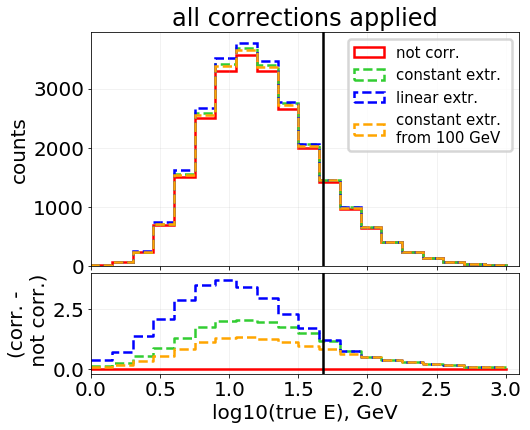

0

In [34]:
plot_true_en(corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied')

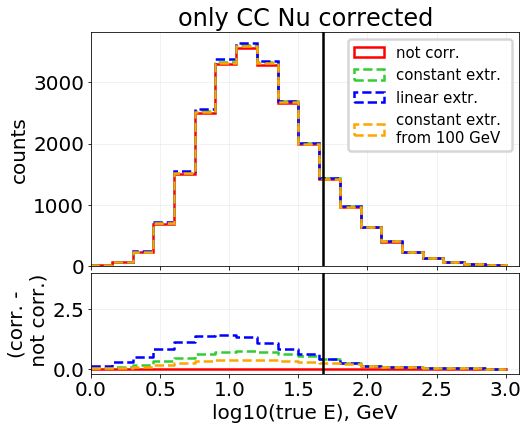

0

In [35]:
plot_true_en(corr={'CCnu':True, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, 
                title='only CC Nu corrected')

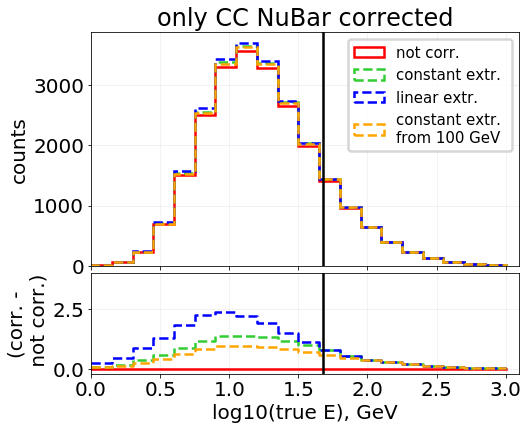

0

In [36]:
plot_true_en(corr={'CCnu':False, 'CCnubar':True, 'NCnu':False, 'NCnubar':False}, 
                title='only CC NuBar corrected')

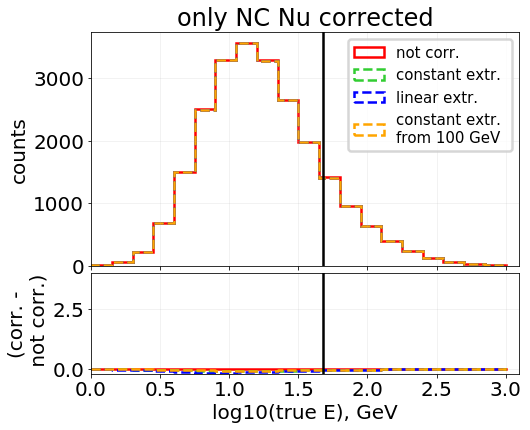

0

In [37]:
plot_true_en(corr={'CCnu':False, 'CCnubar':False, 'NCnu':True, 'NCnubar':False}, 
                title='only NC Nu corrected')

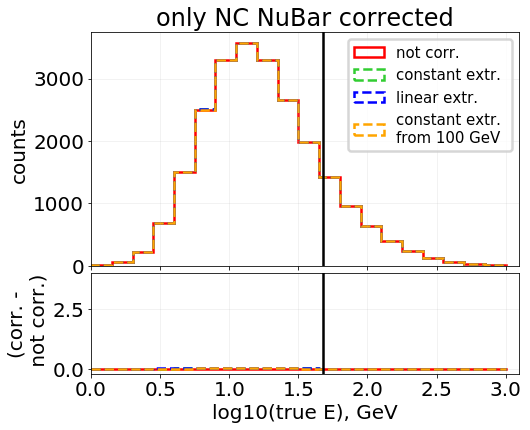

0

In [38]:
plot_true_en(corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':True}, 
                title='only NC NuBar corrected')

In [39]:
def plot_reco_en(plot_val = np.log10(nu['reco_energy']),
                corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied'):
    fig = plt.figure(1, figsize=(7, 5))
    ax = plt.axes(rect1)

    ax.set_xlim(0.,3.1)
    # ax.set_ylim(y_r)
    ax.set_title(title)
    ax.set_ylabel('counts')
    plt.xticks(visible=False)

    w0, m  = get_w(nyears=1.)
    wcorr_c, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'})
    wcorr_lin, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'linear', 'CCnubar':'linear', 'NCnu':'linear', 'NCnubar':'linear'})
    wcorr_c100, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
                  lgE_min_cust=2.0)

    
    h0, be, _ = plt.hist(plot_val, nb, lgE_r, 
                      weights=w0,
                      histtype='step', color='r', linestyle='-',
                        label='not corr.')
    
    hc, be, _ = plt.hist(plot_val, nb, lgE_r, 
                      weights=wcorr_c,
                      histtype='step', color='limegreen', linestyle='--',
                        label='constant extr.')
    hl, be, _ = plt.hist(plot_val, nb, lgE_r, 
                      weights=wcorr_lin,
                      histtype='step', color='b', linestyle='--',
                        label='linear extr.')
    hc100, be, _ = plt.hist(plot_val, nb, lgE_r, 
                      weights=wcorr_c100,
                      histtype='step', color='orange', linestyle='--',
                        label='constant extr. \nfrom 100 GeV')


    bc = be[:-1] + (be[1]-be[0])/2.

    plt.grid(alpha=0.2)
    ax.axvline(1.68, c='k')
    plt.legend(fontsize=15)
    
    ax2 = plt.axes(rect2)

    ax2.set_xlim(0.,3.1)
    ax2.set_ylim(-0.2, 4.)
#     ax2.set_yticks([-50., 0., 100., 200.])
    ax2.set_xlabel('log10(reco E), GeV')
    ax2.set_ylabel('(corr. -\n not corr.)')

    # sigma0, _ = np.histogram(val, nb, lgE_r)
    # sigma0 = np.sqrt(sigma0)*w0

    sigma0 = np.sqrt(h0)

    ax2.step(be, np.concatenate(([0.],(h0-h0))), color='r', linestyle='-')
    ax2.step(be, np.concatenate(([(hc-h0)[0]/sigma0[0]],(hc-h0)/sigma0)), color='limegreen', linestyle='--')
    ax2.step(be, np.concatenate(([(hl-h0)[0]]/sigma0[0],(hl-h0)/sigma0)), color='b', linestyle='--')
    ax2.step(be, np.concatenate(([(hc100-h0)[0]/sigma0[0]],(hc100-h0)/sigma0)), color='orange', linestyle='--')
    
    plt.grid(alpha=0.2)
    ax2.axvline(1.68, c='k')
    plt.show()
    
    return 0

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


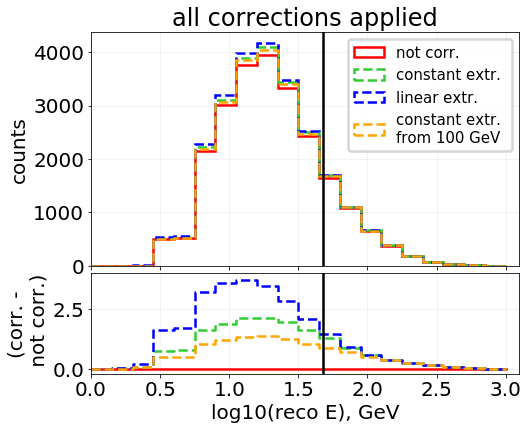

0

In [40]:
plot_reco_en(corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied')

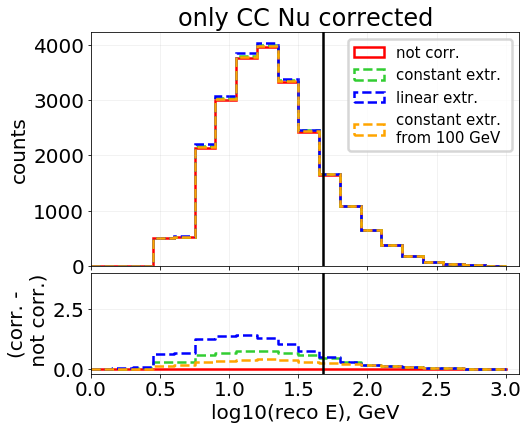

0

In [41]:
plot_reco_en(corr={'CCnu':True, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, 
                title='only CC Nu corrected')

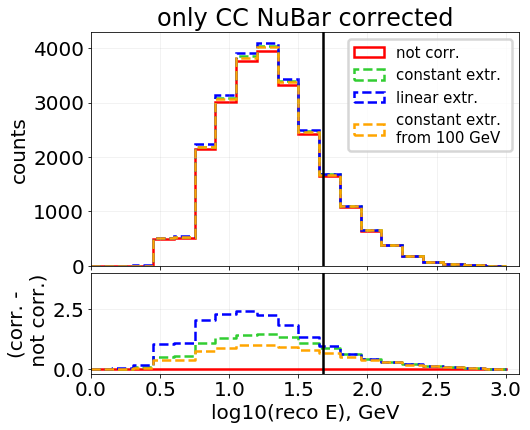

0

In [42]:
plot_reco_en(corr={'CCnu':False, 'CCnubar':True, 'NCnu':False, 'NCnubar':False}, 
                title='only CC NuBar corrected')

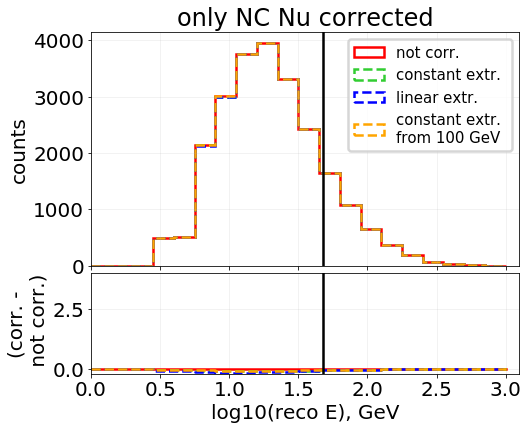

0

In [43]:
plot_reco_en(corr={'CCnu':False, 'CCnubar':False, 'NCnu':True, 'NCnubar':False}, 
                title='only NC Nu corrected')

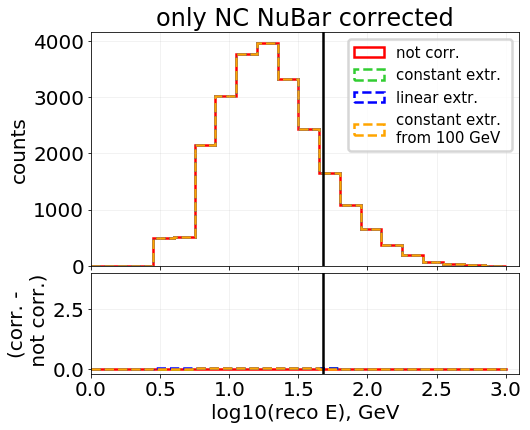

0

In [44]:
plot_reco_en(corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':True}, 
                title='only NC NuBar corrected')

In [45]:
zen_r = [0.,180.]

In [47]:
def plot_reco_zen(plot_val = (nu['reco_zenith']*180/np.pi),
                corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied'):
    fig = plt.figure(1, figsize=(7, 5))
    ax = plt.axes(rect1)

    ax.set_xlim(0.,180.)
    # ax.set_ylim(y_r)
    ax.set_title(title)
    ax.set_ylabel('counts')
    plt.xticks(visible=False)

    w0, m  = get_w(nyears=1.)
    wcorr_c, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'})
    wcorr_lin, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'linear', 'CCnubar':'linear', 'NCnu':'linear', 'NCnubar':'linear'})
    wcorr_c100, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
                  lgE_min_cust=2.0)

    
    h0, be, _ = plt.hist(plot_val, nb, zen_r, 
                      weights=w0,
                      histtype='step', color='r', linestyle='-',
                        label='not corr.')
    
    hc, be, _ = plt.hist(plot_val, nb, zen_r, 
                      weights=wcorr_c,
                      histtype='step', color='limegreen', linestyle='--',
                        label='constant extr.')
    hl, be, _ = plt.hist(plot_val, nb, zen_r, 
                      weights=wcorr_lin,
                      histtype='step', color='b', linestyle='--',
                        label='linear extr.')
    hc100, be, _ = plt.hist(plot_val, nb, zen_r, 
                      weights=wcorr_c100,
                      histtype='step', color='orange', linestyle='--',
                        label='constant extr. \nfrom 100 GeV')


    bc = be[:-1] + (be[1]-be[0])/2.

    plt.grid(alpha=0.2)
    plt.legend(fontsize=15, loc=2)
    
    ax2 = plt.axes(rect2)

    ax2.set_xlim(0.,180.)
    ax2.set_ylim(-0.2, 4.)
#     ax2.set_yticks([-50., 0., 100., 200.])
    ax2.set_xlabel('reco zenith, deg')
    ax2.set_ylabel('(corr. -\n not corr.)')

    # sigma0, _ = np.histogram(val, nb, zen_r)
    # sigma0 = np.sqrt(sigma0)*w0

    sigma0 = np.sqrt(h0)

    ax2.step(be, np.concatenate(([0.],(h0-h0))), color='r', linestyle='-')
    ax2.step(be, np.concatenate(([(hc-h0)[0]/sigma0[0]],(hc-h0)/sigma0)), color='limegreen', linestyle='--')
    ax2.step(be, np.concatenate(([(hl-h0)[0]]/sigma0[0],(hl-h0)/sigma0)), color='b', linestyle='--')
    ax2.step(be, np.concatenate(([(hc100-h0)[0]/sigma0[0]],(hc100-h0)/sigma0)), color='orange', linestyle='--')
    
    plt.grid(alpha=0.2)
    plt.show()
    
    return 0

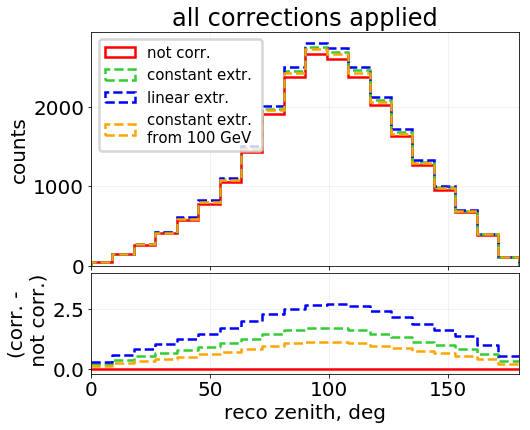

0

In [48]:
plot_reco_zen(corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied')

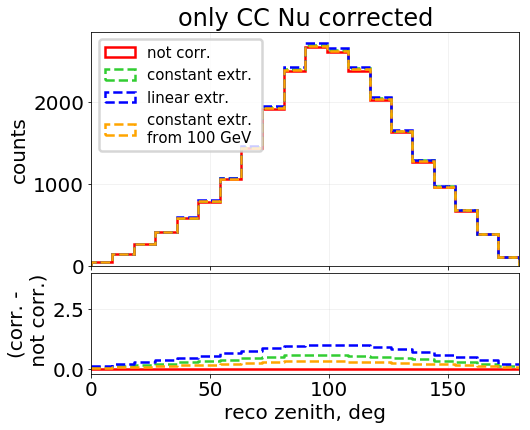

0

In [49]:
plot_reco_zen(corr={'CCnu':True, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, 
                title='only CC Nu corrected')

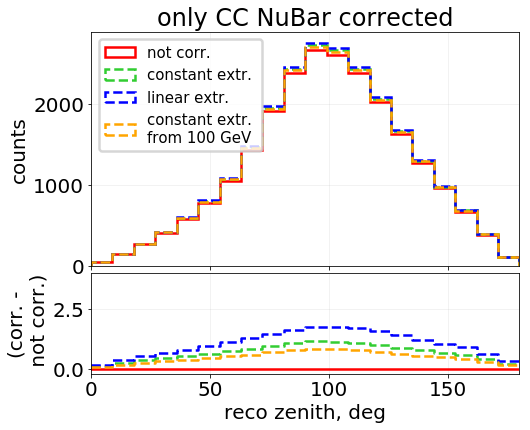

0

In [50]:
plot_reco_zen(corr={'CCnu':False, 'CCnubar':True, 'NCnu':False, 'NCnubar':False}, 
                title='only CC NuBar corrected')

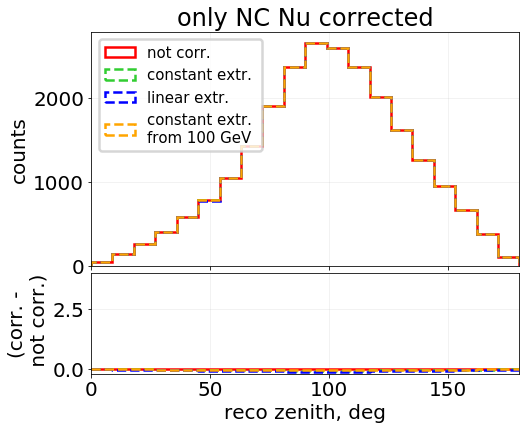

0

In [51]:
plot_reco_zen(corr={'CCnu':False, 'CCnubar':False, 'NCnu':True, 'NCnubar':False}, 
                title='only NC Nu corrected')

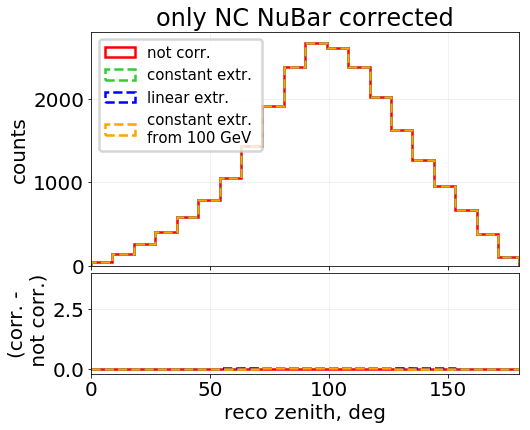

0

In [52]:
plot_reco_zen(corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':True}, 
                title='only NC NuBar corrected')

In [53]:
dllh_r = [-3., 10.]

In [54]:
def plot_reco_dllh(plot_val = nu['delta_llh'],
                 corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                 title='all corrections applied'):
    fig = plt.figure(1, figsize=(7, 5))
    ax = plt.axes(rect1)

    ax.set_xlim(dllh_r)
    # ax.set_ylim(y_r)
    ax.set_title(title)
    ax.set_ylabel('counts')
    plt.xticks(visible=False)

    w0, m  = get_w(nyears=1.)
    wcorr_c, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'})
    wcorr_lin, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'linear', 'CCnubar':'linear', 'NCnu':'linear', 'NCnubar':'linear'})
    wcorr_c100, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
                  lgE_min_cust=2.0)

    
    h0, be, _ = plt.hist(plot_val, nb, dllh_r, 
                      weights=w0,
                      histtype='step', color='r', linestyle='-',
                        label='not corr.')
    
    hc, be, _ = plt.hist(plot_val, nb, dllh_r, 
                      weights=wcorr_c,
                      histtype='step', color='limegreen', linestyle='--',
                        label='constant extr.')
    hl, be, _ = plt.hist(plot_val, nb, dllh_r, 
                      weights=wcorr_lin,
                      histtype='step', color='b', linestyle='--',
                        label='linear extr.')
    hc100, be, _ = plt.hist(plot_val, nb, dllh_r, 
                      weights=wcorr_c100,
                      histtype='step', color='orange', linestyle='--',
                        label='constant extr. \nfrom 100 GeV')


    bc = be[:-1] + (be[1]-be[0])/2.

    plt.grid(alpha=0.2)
    ax.axvline(2., c='k', linestyle='-')
    plt.legend(fontsize=15, loc=1)
    
    ax2 = plt.axes(rect2)

    ax2.set_xlim(dllh_r)
    ax2.set_ylim(-0.2, 4.)
#     ax2.set_yticks([-50., 0., 100., 200.])
    ax2.set_xlabel(r'$\mathrm{\Delta LLH}$')
    ax2.set_ylabel('(corr. -\n not corr.)')

    # sigma0, _ = np.histogram(val, nb, dllh_r)
    # sigma0 = np.sqrt(sigma0)*w0

    sigma0 = np.sqrt(h0)

    ax2.step(be, np.concatenate(([0.],(h0-h0))), color='r', linestyle='-')
    ax2.step(be, np.concatenate(([(hc-h0)[0]/sigma0[0]],(hc-h0)/sigma0)), color='limegreen', linestyle='--')
    ax2.step(be, np.concatenate(([(hl-h0)[0]]/sigma0[0],(hl-h0)/sigma0)), color='b', linestyle='--')
    ax2.step(be, np.concatenate(([(hc100-h0)[0]/sigma0[0]],(hc100-h0)/sigma0)), color='orange', linestyle='--')
    
    ax2.axvline(2., c='k', linestyle='-')
    plt.grid(alpha=0.2)
    plt.show()
    
    return 0

/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mliubar/myjupyter_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


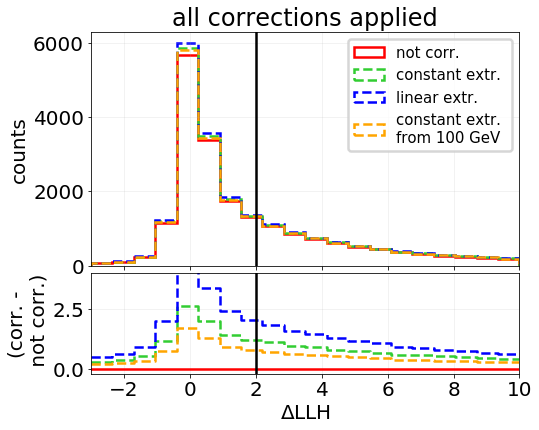

0

In [55]:
plot_reco_dllh(corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied')

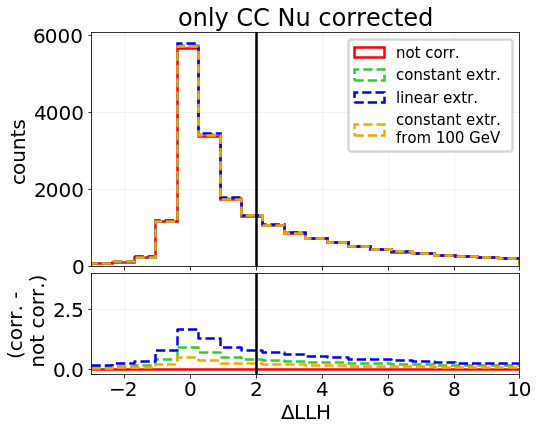

0

In [56]:
plot_reco_dllh(corr={'CCnu':True, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, 
                title='only CC Nu corrected')

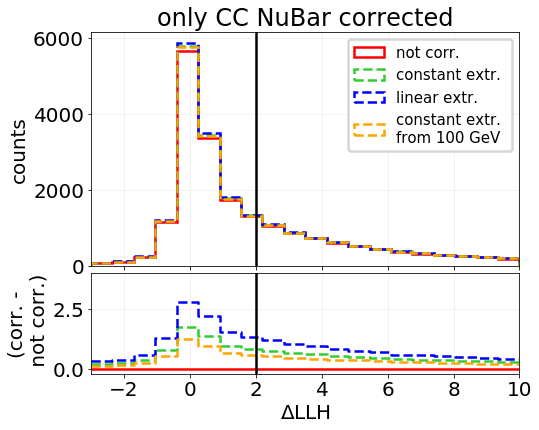

0

In [57]:
plot_reco_dllh(corr={'CCnu':False, 'CCnubar':True, 'NCnu':False, 'NCnubar':False}, 
                title='only CC NuBar corrected')

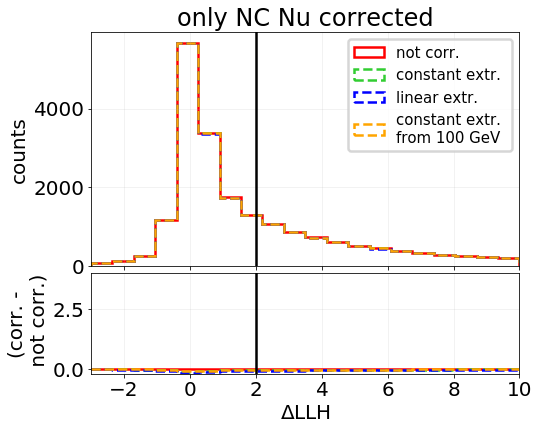

0

In [58]:
plot_reco_dllh(corr={'CCnu':False, 'CCnubar':False, 'NCnu':True, 'NCnubar':False}, 
                title='only NC Nu corrected')

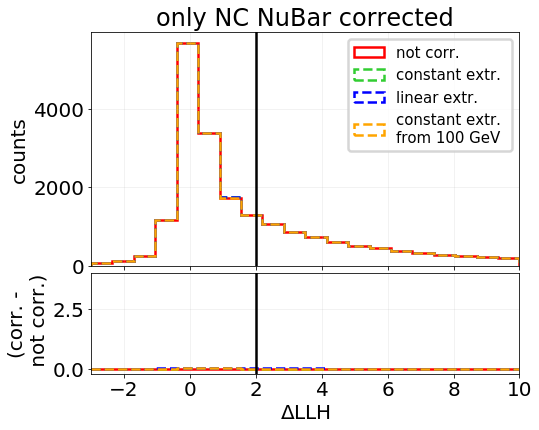

0

In [59]:
plot_reco_dllh(corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':True}, 
                title='only NC NuBar corrected')

In [70]:
def plot_reco_dllh2(plot_val = nu['delta_llh'],
                 corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                 title='all corrections applied'):
    fig = plt.figure(1, figsize=(7, 5))
    ax = plt.axes(rect1)

    ax.set_xlim(dllh_r)
    # ax.set_ylim(y_r)
    ax.set_title(title)
    ax.set_ylabel('counts')
    plt.xticks(visible=False)
    
    bins = np.array([-3.,2., max(nu['delta_llh'])])

    w0, m  = get_w(nyears=1.)
    wcorr_c, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'})
    wcorr_lin, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'linear', 'CCnubar':'linear', 'NCnu':'linear', 'NCnubar':'linear'})
    wcorr_c100, _ = get_w(nyears=1., 
                  corr=corr, \
                  extr={'CCnu':'constant', 'CCnubar':'constant', 'NCnu':'constant', 'NCnubar':'constant'},
                  lgE_min_cust=2.0)

    
    h0, be, _ = plt.hist(plot_val, bins, 
                      weights=w0,
                      histtype='step', color='r', linestyle='-',
                        label='not corr.')
    
    hc, be, _ = plt.hist(plot_val, bins, 
                      weights=wcorr_c,
                      histtype='step', color='limegreen', linestyle='--',
                        label='constant extr.')
    hl, be, _ = plt.hist(plot_val, bins, 
                      weights=wcorr_lin,
                      histtype='step', color='b', linestyle='--',
                        label='linear extr.')
    hc100, be, _ = plt.hist(plot_val, bins, 
                      weights=wcorr_c100,
                      histtype='step', color='orange', linestyle='--',
                        label='constant extr. \nfrom 100 GeV')


    bc = be[:-1] + (be[1]-be[0])/2.

    ct0 = h0[0]/h0[1]
    ctc = hc[0]/hc[1]
    ctl = hl[0]/hl[1]
    ctc100 = hc100[0]/hc100[1]
    
    sig_ct0 = ct0*np.sqrt(1./h0[0]+1./h0[1])
    sig_ctc = ctc*np.sqrt(1./hc[0]+1./hc[1])
    sig_ctl = ctl*np.sqrt(1./hl[0]+1./hl[1])
    sig_ctc100 = ctc100*np.sqrt(1./hc100[0]+1./hc100[1])
    
    plt.text(-2.5, 8000., ('casc / tr ='), color='k')
    plt.text(-2.5, 6800., ('{:.2f}'.format(ct0)+r'$\pm${:.2f}'.format(sig_ct0)), color='red')
    plt.text(-2.5, 5600., ('{:.2f}'.format(ctc)+r'$\pm${:.2f}'.format(sig_ctc)), color='limegreen')
    plt.text(-2.5, 4400., ('{:.2f}'.format(ctl)+r'$\pm${:.2f}'.format(sig_ctl)), color='b')
    plt.text(-2.5, 3200., ('{:.2f}'.format(ctc100)+r'$\pm${:.2f}'.format(sig_ctc100)), color='orange')
    
    plt.grid(alpha=0.2)
    ax.axvline(2., c='k', linestyle='-')
    plt.legend(fontsize=15, loc=4)
    
    ax2 = plt.axes(rect2)

    ax2.set_xlim(dllh_r)
    ax2.set_ylim(-1., 8.)
#     ax2.set_yticks([0., 400., 800.])
    ax2.set_xlabel(r'$\mathrm{\Delta LLH}$')
    ax2.set_ylabel('(corr. -\n not corr.)')

    # sigma0, _ = np.histogram(val, nb, dllh_r)
    # sigma0 = np.sqrt(sigma0)*w0

    sigma0 = np.sqrt(h0)

    ax2.step(be, np.concatenate(([0.],(h0-h0))), color='r', linestyle='-')
    ax2.step(be, np.concatenate(([(hc-h0)[0]/sigma0[0]],(hc-h0)/sigma0)), color='limegreen', linestyle='--')
    ax2.step(be, np.concatenate(([(hl-h0)[0]]/sigma0[0],(hl-h0)/sigma0)), color='b', linestyle='--')
    ax2.step(be, np.concatenate(([(hc100-h0)[0]/sigma0[0]],(hc100-h0)/sigma0)), color='orange', linestyle='--')
    
    ax2.axvline(2., c='k', linestyle='-')
    plt.grid(alpha=0.2)
    plt.show()
    
    return 0

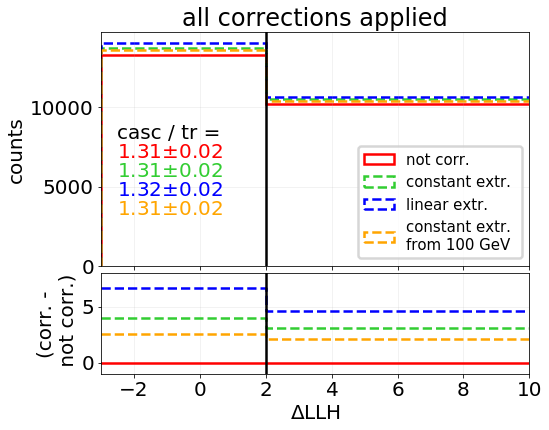

0

In [71]:
plot_reco_dllh2(corr={'CCnu':True, 'CCnubar':True, 'NCnu':True, 'NCnubar':True}, 
                title='all corrections applied')

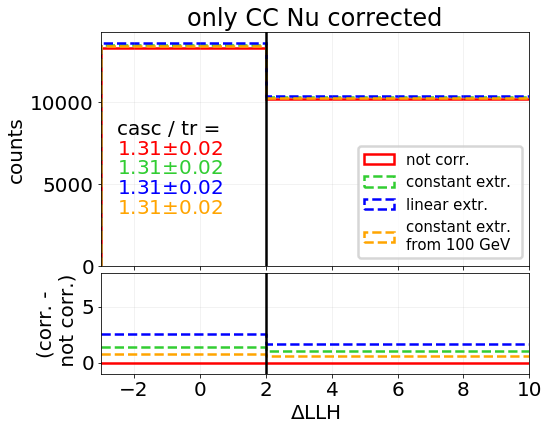

0

In [72]:
plot_reco_dllh2(corr={'CCnu':True, 'CCnubar':False, 'NCnu':False, 'NCnubar':False}, 
                title='only CC Nu corrected')

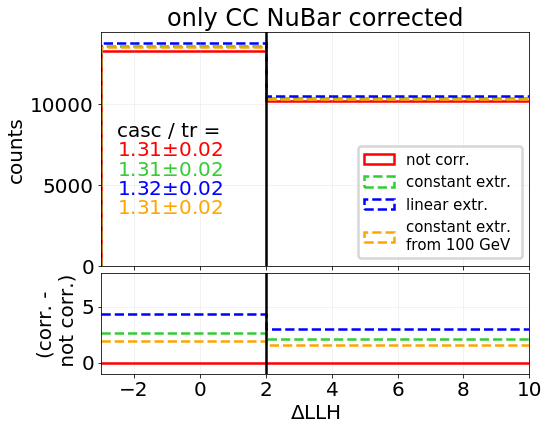

0

In [73]:
plot_reco_dllh2(corr={'CCnu':False, 'CCnubar':True, 'NCnu':False, 'NCnubar':False}, 
                title='only CC NuBar corrected')

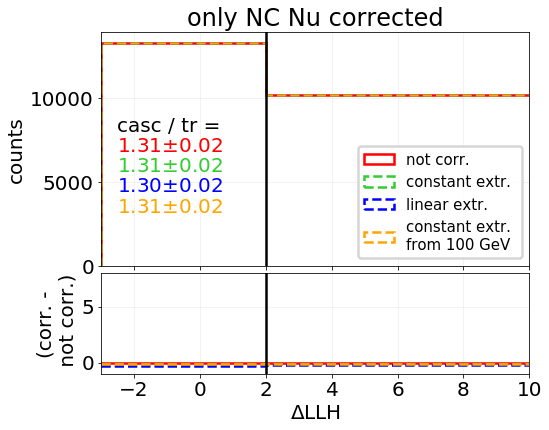

0

In [74]:
plot_reco_dllh2(corr={'CCnu':False, 'CCnubar':False, 'NCnu':True, 'NCnubar':False}, 
                title='only NC Nu corrected')

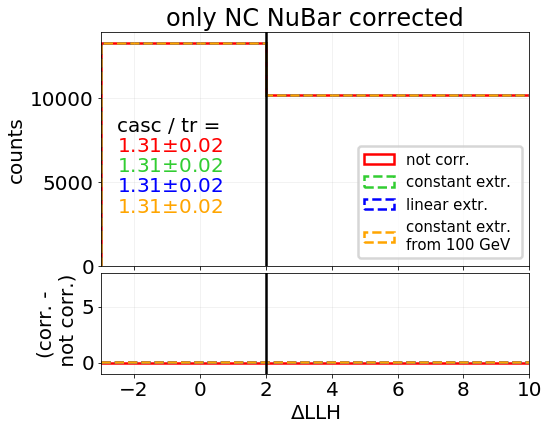

0

In [75]:
plot_reco_dllh2(corr={'CCnu':False, 'CCnubar':False, 'NCnu':False, 'NCnubar':True}, 
                title='only NC NuBar corrected')